<a href="https://colab.research.google.com/github/venkatrohit219/gender-detection-from-speech/blob/main/gender%20identification%20from%20speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [5]:
#------- Importing the Libraries 
import numpy as np
np.set_printoptions(threshold=np.inf) #Showing all the array in Console
import matplotlib.pyplot as plt
import pandas as pd

#------ Importing the DataSet 
dataset = pd.read_csv('voice.csv')

In [6]:
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
dataset.corr()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


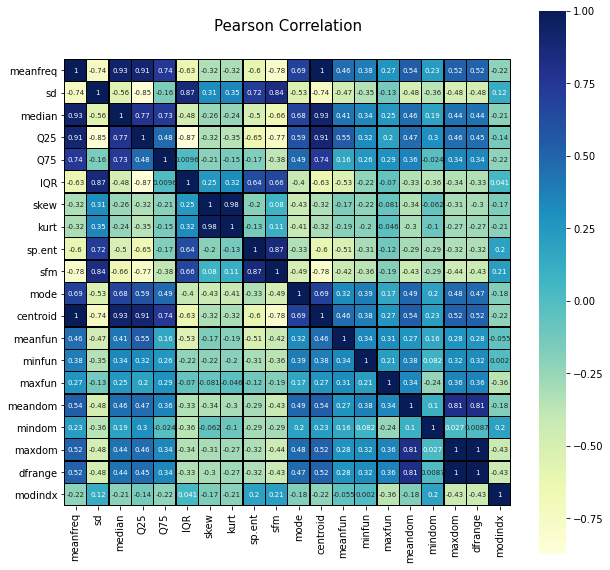

In [8]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation', y=1.05, size=15)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
sns.heatmap(dataset.iloc[:,:-1].astype(float).corr(), linewidths=0.3, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True, annot_kws={"size": 7})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


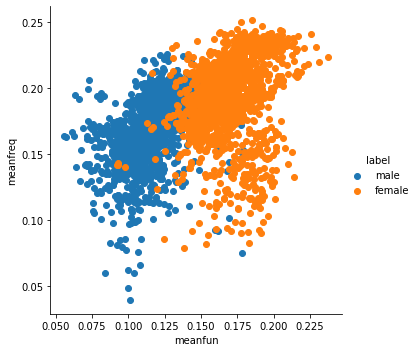

In [9]:
# We can compare other features by simply change "meanfun" and "meanfreq"
sns.FacetGrid(dataset, hue="label", size=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


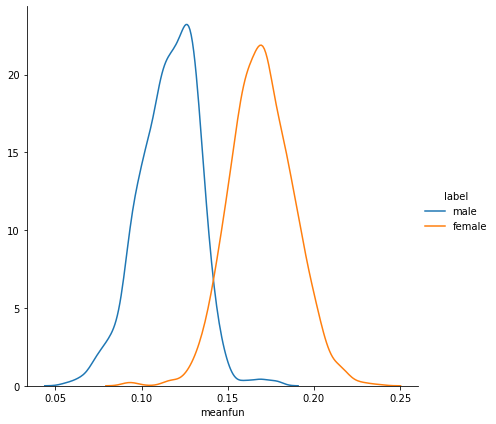

In [10]:
# We can visualize other features by substituting "meanfun"
sns.FacetGrid(dataset, hue="label", size=6) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.show()

In [13]:
#------ Separating the Independent and Dependent Variables
# Getting all Columns, except the last one with the genders
X = dataset.iloc[:, : -1].values
# Getting the last column
y = dataset.iloc[:, 20].values 

#------ Taking Care of Missing Data
# dataset.isnull().sum() 
# No Need of Taking Care of Missing Data :)
#------ Checking the Number of Male and Females
print("Number of Males {}".format(dataset[dataset.label == 'male'].shape[0])) # shape returns the dimensions of the array. If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n. 
print("Number of Females {}".format(dataset[dataset.label == 'female'].shape[0]))

Number of Males 1584
Number of Females 1584


In [14]:
#------ Encoding Categorical Data of the Dependent Variable
# male -> 1
# female -> 0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#------ Splitting the Dataset into the Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#------- Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Creating a Dictionaire
model_accuracy = {}

In [15]:
#                                                   #
#                Logistic Regression                #
#                                                   #
#####################################################

#------- Fitting Logistic Regression to the Training Set 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#------- Predicting the Test Set Results
y_pred = classifier.predict(X_test)

#------- Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#------- Calculating the Performance of Logistic Regression
from sklearn import metrics
print( "Accuracy of Logistic Regression: {}".format(metrics.accuracy_score(y_test,y_pred)) ) # 0.971608832808

model_accuracy['Logistic Regression'] = metrics.accuracy_score(y_test,y_pred)

Accuracy of Logistic Regression: 0.9716088328075709


In [16]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2 )
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

#------- Calculating the Performance of K-NN
from sklearn import metrics
print( "Accuracy of K-NN: {}".format(metrics.accuracy_score(y_test,y_pred)) ) # 0.965299684543

model_accuracy['K-NN'] = metrics.accuracy_score(y_test,y_pred)

Accuracy of K-NN: 0.9652996845425867


In [17]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#------- Calculating the Performance of Kernel SVM
from sklearn import metrics
print( "Accuracy of Kernel SVM - RBF: {}".format(metrics.accuracy_score(y_test,y_pred)) ) # 0.9747634069400631
	 
model_accuracy['Kernel SVM - RBF'] = metrics.accuracy_score(y_test,y_pred)

Accuracy of Kernel SVM - RBF: 0.9747634069400631


In [18]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#------- Calculating the Performance of SVM
from sklearn import metrics
print( "Accuracy of Kernel SVM - Linear: {}".format(metrics.accuracy_score(y_test,y_pred)) ) # 0.9747634069400631

model_accuracy['Kernel SVM - Linear'] = metrics.accuracy_score(y_test,y_pred)

Accuracy of Kernel SVM - Linear: 0.9747634069400631


In [19]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#------- Calculating the Performance of Naive Bayes
from sklearn import metrics
print( "Accuracy of Naive Bayes Model: {}".format(metrics.accuracy_score(y_test,y_pred)) ) # 0.8990536277602523

model_accuracy['Naive Bayes'] = metrics.accuracy_score(y_test,y_pred)

Accuracy of Naive Bayes Model: 0.8990536277602523


In [20]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#------- Calculating the Performance of Decision Tree Classification
from sklearn import metrics
print( "Accuracy of Decision Tree Classification: {}".format(metrics.accuracy_score(y_test,y_pred)) ) # 0.9463722397476341

model_accuracy['Decision Tree'] = metrics.accuracy_score(y_test,y_pred)

Accuracy of Decision Tree Classification: 0.9463722397476341


In [21]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=250, criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#------- Calculating the Performance of Random Forest Classification
from sklearn import metrics
print( "Accuracy of Random Forest Classification: {}".format(metrics.accuracy_score(y_test,y_pred)) ) # 0.9779179810725552

model_accuracy['Random Forest'] = metrics.accuracy_score(y_test,y_pred)

Accuracy of Random Forest Classification: 0.9747634069400631


In [22]:
header = list(dataset)

classifier.fit(X_train, y_train)
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] # list in reverse order

# Print the feature ranking
print("Feature ranking:")
header1 = []
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, header[indices[f]], importances[indices[f]]))
    header1.append(header[indices[f]])

Feature ranking:
1. Feature meanfun (0.362856)
2. Feature IQR (0.183142)
3. Feature Q25 (0.113950)
4. Feature sd (0.095970)
5. Feature sp.ent (0.035143)
6. Feature sfm (0.034589)
7. Feature mode (0.020395)
8. Feature meanfreq (0.019150)
9. Feature centroid (0.018943)
10. Feature median (0.014553)
11. Feature Q75 (0.012724)
12. Feature minfun (0.011989)
13. Feature maxdom (0.011902)
14. Feature dfrange (0.011233)
15. Feature skew (0.011195)
16. Feature kurt (0.010248)
17. Feature meandom (0.008922)
18. Feature mindom (0.008845)
19. Feature modindx (0.008096)
20. Feature maxfun (0.006156)


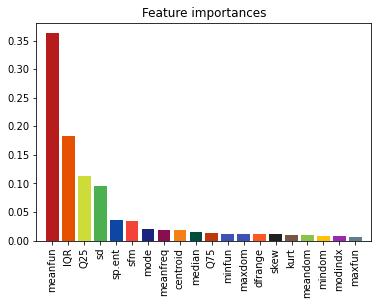

In [23]:
import random 
colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#3F51B5', '#2196F3',
          '#03A9F4' ,'#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B',
          '#FFC107', '#FF9800', '#FF5722', '#795548', '#607D8B', '#B71C1C', '#880E4F',
          '#4A148C', '#311B92', '#1A237E', '#0D47A1', '#01579B', '#006064', '#004D40',
          '#1B5E20', '#33691E', '#827717', '#F57F17', '#FF6F00', '#E65100', '#BF360C',
          '#3E2723', '#212121', '#607D8B']

random_colors = random.sample(colors, 20)

plt.figure()

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color=random_colors, align="center")
plt.xticks(range(X.shape[1]),header1, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

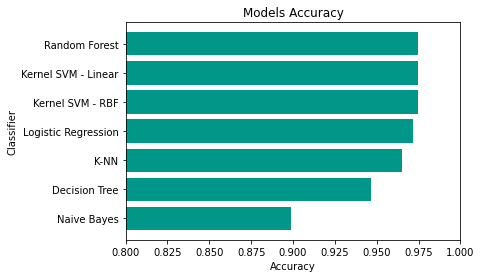

In [24]:
from collections import OrderedDict
model_accuracy = OrderedDict(sorted(model_accuracy.items(), key=lambda t: t[1]))

plt.figure()
plt.title("Models Accuracy")
plt.barh(range(len(model_accuracy)), model_accuracy.values(), align='center', color='#009688')
plt.yticks(range(len(model_accuracy)), model_accuracy.keys(), rotation = 0)
axes = plt.gca()
axes.set_xlim([0.8,1.0])
plt.xlabel("Accuracy")
plt.ylabel('Classifier')
plt.show()